<a href="https://colab.research.google.com/github/PGPradhan/CRM-Dashboard/blob/main/Sales-Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIHC Mini Project

TOPIC: Breast Cancer classification and determining importance of features using SHAP

**Group Members**

Muskan Bahrani D17B-02

Kaustubh Kharche D17B-35

**Importing required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [ ]:
dataset = sklearn.datasets.load_breast_cancer()

**Converting dataset into pandas dataframe**

In [ ]:
dataframe = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [ ]:
dataframe.shape

(569, 30)

**The dataset contains 569 records having 30 features**

In [ ]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

**The dataset does not contain any null values**

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
dataframe['diagnosis'] = dataset['target']

**As our dataframe is not labelled we will add a column of target variable to our dataframe and label it as 'Diagnosis'**

In [ ]:
dataframe.shape

(569, 31)

**Now our dataframe is labelled**

In [ ]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
dataframe['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**The dataframe contains 357 records of people having breast cancer and 212 records of people not having breast cancer**

**From this we can say that our dataset is not skewed**

**Separating data and target variable for classification**

In [ ]:
# separarting the data and labels for further analysis
X = dataframe.drop(['diagnosis'],axis=1)
Y = dataframe['diagnosis']

In [ ]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

**Splitting into training data and test data**

In [ ]:
#splitting into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


**Loading our model**

In [ ]:
model = LogisticRegression()

**Training the model using training data**

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print(training_data_accuracy*100)

94.28571428571428


**The accuracy on test data is 95%**

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print(test_data_accuracy*100)

95.6140350877193


**Evaluating model using custom input**

In [ ]:
# Building a predictive system
data = [9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773]
data_as_array = np.asarray(data)
reshaped_array = data_as_array.reshape(1,-1)
prediction = model.predict(reshaped_array)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Plotting confusion matrix to evaluate model's performance**

**In healthcare sector we can accept if a model predicts positive for a negative case but we cannot accept a model that makes negative prediction for a positive case**

**It means that False Negative rate must be low**

**We will also calculate true positive rate to evaluate our model**

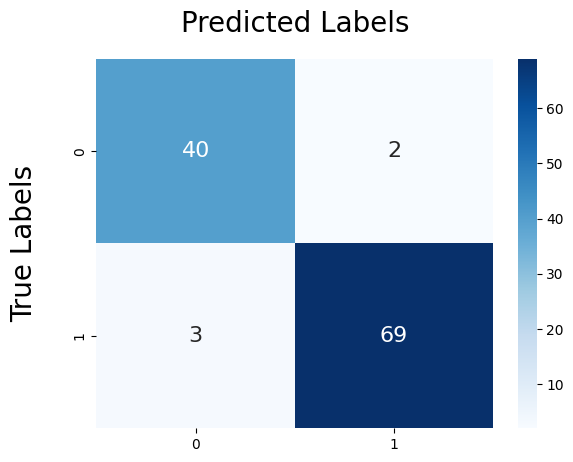

In [ ]:
conf_matrix = confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
plt.show()

In [ ]:
precision = precision_score(Y_test, X_test_prediction)
print(f'Precision: {precision:.2f}')

Precision: 0.97


In [ ]:
recall = recall_score(Y_test, X_test_prediction)
print(f'Recall (True Positive Rate): {recall:.2f}')

Recall (True Positive Rate): 0.96


In [ ]:
f1 = f1_score(Y_test, X_test_prediction)
print(f'F1-Score: {f1:.2f}')

F1-Score: 0.97


In [ ]:
false_negatives = 3
true_positives = 69
fnr = false_negatives / (true_positives + false_negatives)
print(fnr)

0.041666666666666664


**The FNR comes out to be 0.04 which is falls under acceptable range**

**Installing SHAP which stands for Shapley Additive Explanations and it is a python package which we are using to explain impact of each feature in making prediction**

**we will do that by calculating shapely values which gives the contribution done by each feature in making prediction**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


**Importing SHAP**

In [ ]:
import shap

**Loading the explainer using our logistic regression model and we are giving our evaluation array as input to see contribution of features in producing result**

In [ ]:
explainer = shap.Explainer(model,reshaped_array)

**Calculating SHAP values**

In [ ]:
shap_values = explainer(X)

In [ ]:
print(shap_values)

.values =
array([[ 9.33560541e+00, -7.12785125e-01,  9.96449636e+00, ...,
        -4.67035084e-02, -4.26075402e-02, -2.30697628e-03],
       [ 1.21739111e+01,  1.84424501e+00,  1.15757902e+01, ...,
        -2.84479156e-02, -5.94247423e-03, -6.32639355e-04],
       [ 1.12058068e+01,  3.04836745e+00,  1.11131415e+01, ...,
        -4.15533160e-02, -2.30369918e-02, -5.51948419e-04],
       ...,
       [ 7.80644072e+00,  5.41163076e+00,  7.65125273e+00, ...,
        -1.82854823e-02,  4.59551340e-03, -2.63366251e-05],
       [ 1.22069146e+01,  5.84414600e+00,  1.27244353e+01, ...,
        -4.66115407e-02, -3.24261010e-02, -2.59275668e-03],
       [-1.91860663e+00,  4.18674758e+00, -1.98141282e+00, ...,
         1.43170751e-02, -8.33927217e-03,  4.11299634e-04]])

.base_values =
array([7.49380457, 7.49380457, 7.49380457, 7.49380457, 7.49380457,
       7.49380457, 7.49380457, 7.49380457, 7.49380457, 7.49380457,
       7.49380457, 7.49380457, 7.49380457, 7.49380457, 7.49380457,
       7.4938045

**A summary plot that will display highly contributing features to features that have least contribution from top to bottom**

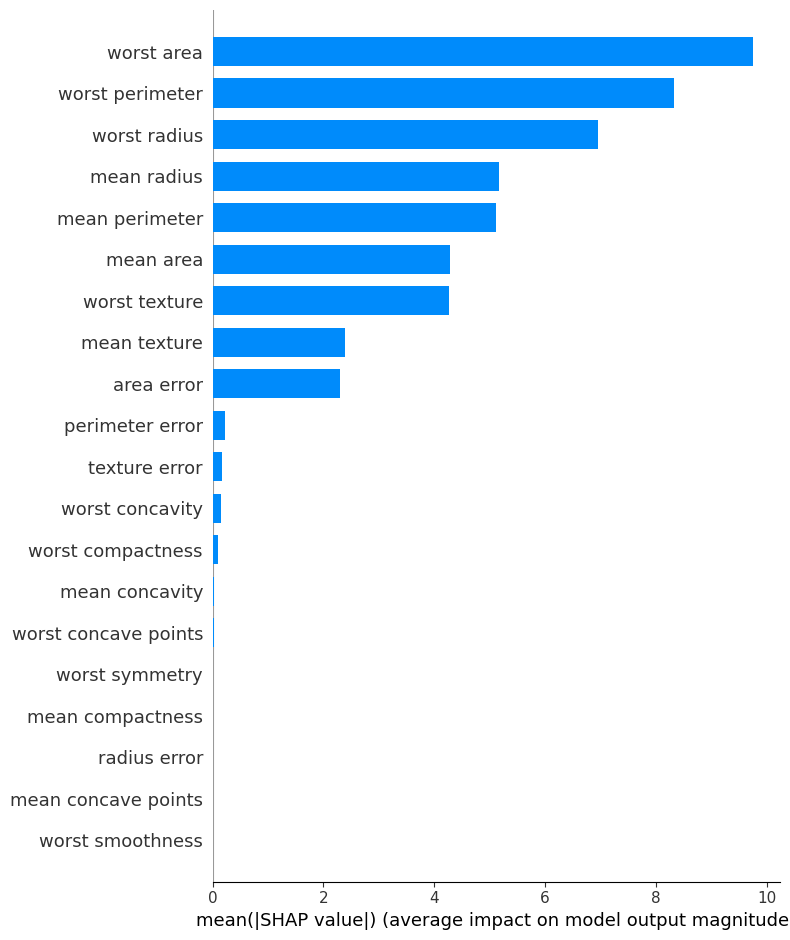

In [ ]:
# Create a summary plot
shap.summary_plot(shap_values, reshaped_array, plot_type="bar")

# References
https://blog.cloudera.com/ml-interpretability-lime-and-shap-in-prose-and-code/

https://www.youtube.com/watch?v=9haIOplEIGM&t=100s

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html